# Problem statement:
* Analysing the Risk of Heart Attack Based on Patient Health Metrics and Lifestyle Factors.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('heart_attack_dataset.csv')
df

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome
0,31,Male,194,162,71,22.9,0,1,0,0,...,Yes,Downsloping,1,Normal,0,0,Suburban,Retired,Single,No Heart Attack
1,69,Male,208,148,93,33.9,1,1,0,0,...,Yes,Upsloping,2,Normal,0,0,Suburban,Unemployed,Married,No Heart Attack
2,34,Female,132,161,94,34.0,0,0,1,1,...,Yes,Upsloping,0,Normal,1,0,Rural,Retired,Single,Heart Attack
3,53,Male,268,134,91,35.0,0,1,1,0,...,Yes,Flat,0,Reversible defect,1,0,Suburban,Retired,Widowed,No Heart Attack
4,57,Female,203,140,75,30.1,0,1,0,0,...,Yes,Flat,0,Fixed defect,1,0,Rural,Retired,Married,Heart Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372969,49,Female,285,131,79,27.6,0,1,1,1,...,Yes,Flat,2,Fixed defect,1,0,Urban,Employed,Married,No Heart Attack
372970,77,Male,197,159,64,33.5,0,1,0,1,...,No,Downsloping,3,Fixed defect,0,1,Urban,Employed,Married,Heart Attack
372971,53,Female,243,94,84,34.7,1,1,1,0,...,Yes,Flat,3,Reversible defect,1,1,Urban,Retired,Married,Heart Attack
372972,78,Female,291,93,78,29.3,1,1,0,1,...,Yes,Upsloping,1,Fixed defect,0,0,Urban,Employed,Married,No Heart Attack


In [7]:
df.shape

(372974, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372974 entries, 0 to 372973
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Age                    372974 non-null  int64  
 1   Gender                 372974 non-null  object 
 2   Cholesterol            372974 non-null  int64  
 3   BloodPressure          372974 non-null  int64  
 4   HeartRate              372974 non-null  int64  
 5   BMI                    372974 non-null  float64
 6   Smoker                 372974 non-null  int64  
 7   Diabetes               372974 non-null  int64  
 8   Hypertension           372974 non-null  int64  
 9   FamilyHistory          372974 non-null  int64  
 10  PhysicalActivity       372974 non-null  int64  
 11  AlcoholConsumption     372974 non-null  int64  
 12  Diet                   372974 non-null  object 
 13  StressLevel            372974 non-null  int64  
 14  Ethnicity              372974 non-nu

In [4]:
df.describe()

,Age,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,PhysicalActivity,AlcoholConsumption,StressLevel,Income,MaxHeartRate,ST_Depression,NumberOfMajorVessels,PreviousHeartAttack,StrokeHistory
count,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000
mean,56.975151,199.455844,134.508234,89.495043,29.006733,0.499225,0.500987,0.500973,0.499901,3.003475,2.000048,5.001885,110033.409913,149.463896,2.501799,1.498525,0.496938,0.500815
std,15.867016,57.723381,25.984528,17.342658,6.345460,0.500000,0.500000,0.500000,0.500001,2.000114,1.414572,2.582025,51961.721991,28.849990,1.443696,1.118003,0.499991,0.500000
min,30.000000,100.000000,90.000000,60.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20000.000000,100.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,149.000000,112.000000,74.000000,23.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,64957.250000,124.000000,1.250000,0.000000,0.000000,0.000000
50%,57.000000,199.000000,134.000000,89.000000,29.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,5.000000,110111.000000,149.000000,2.500000,1.000000,0.000000,1.000000
75%,71.000000,249.000000,157.000000,105.000000,34.500000,1.000000,1.000000,1.000000,1.000000,5.000000,3.000000,7.000000,155012.000000,174.000000,3.750000,2.000000,1.000000,1.000000
max,84.000000,299.000000,179.000000,119.000000,40.000000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,9.000000,199999.000000,199.000000,5.000000,3.000000,1.000000,1.000000


In [5]:
df.describe(include='all')

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome
count,372974.000000,372974,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,...,372974,372974,372974.000000,372974,372974.000000,372974.000000,372974,372974,372974,372974
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,3,NaN,3,NaN,NaN,3,3,4,2
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,Flat,NaN,Normal,NaN,NaN,Suburban,Unemployed,Single,No Heart Attack
freq,NaN,186770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,186501,124546,NaN,125106,NaN,NaN,124721,124706,93599,186658
mean,56.975151,NaN,199.455844,134.508234,89.495043,29.006733,0.499225,0.500987,0.500973,0.499901,...,NaN,NaN,1.498525,NaN,0.496938,0.500815,NaN,NaN,NaN,NaN
std,15.867016,NaN,57.723381,25.984528,17.342658,6.345460,0.500000,0.500000,0.500000,0.500001,...,NaN,NaN,1.118003,NaN,0.499991,0.500000,NaN,NaN,NaN,NaN
min,30.000000,NaN,100.000000,90.000000,60.000000,18.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,43.000000,NaN,149.000000,112.000000,74.000000,23.500000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,57.000000,NaN,199.000000,134.000000,89.000000,29.000000,0.000000,1.000000,1.000000,0.000000,...,NaN,NaN,1.000000,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,71.000000,NaN,249.000000,157.000000,105.000000,34.500000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,2.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN


In [64]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,372974.0,NaN,NaN,NaN,56.975151,15.867016,30.0,43.0,57.0,71.0,84.0
Gender,372974,2,Male,186770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cholesterol,372974.0,NaN,NaN,NaN,199.455844,57.723381,100.0,149.0,199.0,249.0,299.0
BloodPressure,372974.0,NaN,NaN,NaN,134.508234,25.984528,90.0,112.0,134.0,157.0,179.0
HeartRate,372974.0,NaN,NaN,NaN,89.495043,17.342658,60.0,74.0,89.0,105.0,119.0
BMI,372974.0,NaN,NaN,NaN,29.006733,6.34546,18.0,23.5,29.0,34.5,40.0
Smoker,372974,2,No,186776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Diabetes,372974,2,Yes,186855,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hypertension,372974,2,Yes,186850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FamilyHistory,372974,2,No,186524,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

Age                      0
Gender                   0
Cholesterol              0
BloodPressure            0
HeartRate                0
BMI                      0
Smoker                   0
Diabetes                 0
Hypertension             0
FamilyHistory            0
PhysicalActivity         0
AlcoholConsumption       0
Diet                     0
StressLevel              0
Ethnicity                0
Income                   0
EducationLevel           0
Medication               0
ChestPainType            0
ECGResults               0
MaxHeartRate             0
ST_Depression            0
ExerciseInducedAngina    0
Slope                    0
NumberOfMajorVessels     0
Thalassemia              0
PreviousHeartAttack      0
StrokeHistory            0
Residence                0
EmploymentStatus         0
MaritalStatus            0
Outcome                  0
dtype: int64

### There are no null values in the dataset.

# Univariate analysis.
* Doing an analysis on Categorical column.

In [7]:
df['Gender'].value_counts()

Gender
Male      186770
Female    186204
Name: count, dtype: int64

### Interpretation:
* There are 186,770 males and 186,204 females in the dataset.
* The gender distribution is almost equal, with a very small difference of just 566 individuals.
* This suggests that your dataset is balanced in terms of gender, which is important for fair and unbiased analysis

In [8]:
df['Diet'].value_counts()

Diet
Moderate     125079
Healthy      124091
Unhealthy    123804
Name: count, dtype: int64

###  Interpretation:
* Moderate diet is the most common, followed by Healthy, and then Unhealthy.
* The difference between the categories is small:
1. Moderate: 125,079
2. Healthy: 124,091
3. Unhealthy: 123,804
* This shows that dietary habits in the dataset are fairly evenly distributed, with a slight preference toward moderate and healthy eating.

In [9]:
df['Ethnicity'].value_counts()

Ethnicity
White       74969
Asian       74942
Black       74532
Hispanic    74350
Other       74181
Name: count, dtype: int64

In [10]:
df['EducationLevel'].value_counts()

EducationLevel
High School     124912
College         124040
Postgraduate    124022
Name: count, dtype: int64

### Interpretation:
* All three categories are almost equally represented, with a very slight majority of high school graduates.
* This balance makes the dataset ideal for analyzing how education level influence.
  

In [11]:
df['Medication'].value_counts()

Medication
No     186526
Yes    186448
Name: count, dtype: int64

### Interpretation:
* The medication distribution is almost perfectly balanced, with about half the individuals on medication and the other half not.
* This balance allows us to fairly compare outcomes between the two groups without worrying about skewed data.

In [12]:
df['ChestPainType'].value_counts()

ChestPainType
Asymptomatic    93609
Atypical        93262
Typical         93126
Non-anginal     92977
Name: count, dtype: int64

### Interpretation:
* All four categories are very close in count, differing by less than 700 records.
*This balanced distribution is ideal for comparing how different chest pain types relate to conditions like heart disease or risk factors.



In [13]:
df['EmploymentStatus'].value_counts()

EmploymentStatus
Unemployed    124706
Retired       124373
Employed      123895
Name: count, dtype: int64

### Interpretation:
* This distribution ensures a balanced analysis across employment status, allowing us to explore how work status may influence health outcomes or behaviors.

In [14]:
df['MaritalStatus'].value_counts()

MaritalStatus
Single      93599
Widowed     93467
Divorced    93094
Married     92814
Name: count, dtype: int64

### Interpretation:
* The range between the highest and lowest counts is less than 800, showing a very balanced representation.

* This makes the dataset statistically reliable when exploring how marital status might impact health, stress levels, or access to support systems

In [15]:
df['Outcome'].value_counts()

Outcome
No Heart Attack    186658
Heart Attack       186316
Name: count, dtype: int64

### Interpretation:
* The difference is only 342 cases, indicating a highly balanced dataset.

In [16]:
df['Residence'].value_counts()

Residence
Suburban    124721
Rural       124336
Urban       123917
Name: count, dtype: int64

In [17]:
df['Thalassemia'].value_counts()

Thalassemia
Normal               125106
Reversible defect    124071
Fixed defect         123797
Name: count, dtype: int64

# Bivariate analysis:


In [18]:
df.groupby('Gender')['Outcome'].value_counts()

Gender  Outcome        
Female  Heart Attack       93193
        No Heart Attack    93011
Male    No Heart Attack    93647
        Heart Attack       93123
Name: count, dtype: int64

In [19]:
df.groupby('Diet')['Outcome'].value_counts()

Diet       Outcome        
Healthy    Heart Attack       62046
           No Heart Attack    62045
Moderate   No Heart Attack    62577
           Heart Attack       62502
Unhealthy  No Heart Attack    62036
           Heart Attack       61768
Name: count, dtype: int64

In [20]:
df.groupby('Ethnicity')['Outcome'].value_counts()

Ethnicity  Outcome        
Asian      Heart Attack       37511
           No Heart Attack    37431
Black      No Heart Attack    37392
           Heart Attack       37140
Hispanic   Heart Attack       37324
           No Heart Attack    37026
Other      No Heart Attack    37166
           Heart Attack       37015
White      No Heart Attack    37643
           Heart Attack       37326
Name: count, dtype: int64

In [21]:
df['Smoker']=df['Smoker'].replace([0,1],['No','Yes'])       # replacing [0,1] to ['No','Yes'] of the smoker column

In [22]:
df['Smoker']

0          No
1         Yes
2          No
3          No
4          No
         ... 
372969     No
372970     No
372971    Yes
372972    Yes
372973    Yes
Name: Smoker, Length: 372974, dtype: object

In [23]:
df.head()

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome
0,31,Male,194,162,71,22.9,No,1,0,0,...,Yes,Downsloping,1,Normal,0,0,Suburban,Retired,Single,No Heart Attack
1,69,Male,208,148,93,33.9,Yes,1,0,0,...,Yes,Upsloping,2,Normal,0,0,Suburban,Unemployed,Married,No Heart Attack
2,34,Female,132,161,94,34.0,No,0,1,1,...,Yes,Upsloping,0,Normal,1,0,Rural,Retired,Single,Heart Attack
3,53,Male,268,134,91,35.0,No,1,1,0,...,Yes,Flat,0,Reversible defect,1,0,Suburban,Retired,Widowed,No Heart Attack
4,57,Female,203,140,75,30.1,No,1,0,0,...,Yes,Flat,0,Fixed defect,1,0,Rural,Retired,Married,Heart Attack


In [24]:
df['Diabetes']=df['Diabetes'].replace([0,1],['No','Yes'])      # replacing [0,1] to ['No','Yes'] of the Diabetes column
df['Diabetes']

0         Yes
1         Yes
2          No
3         Yes
4         Yes
         ... 
372969    Yes
372970    Yes
372971    Yes
372972    Yes
372973    Yes
Name: Diabetes, Length: 372974, dtype: object

In [25]:
df.head()

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome
0,31,Male,194,162,71,22.9,No,Yes,0,0,...,Yes,Downsloping,1,Normal,0,0,Suburban,Retired,Single,No Heart Attack
1,69,Male,208,148,93,33.9,Yes,Yes,0,0,...,Yes,Upsloping,2,Normal,0,0,Suburban,Unemployed,Married,No Heart Attack
2,34,Female,132,161,94,34.0,No,No,1,1,...,Yes,Upsloping,0,Normal,1,0,Rural,Retired,Single,Heart Attack
3,53,Male,268,134,91,35.0,No,Yes,1,0,...,Yes,Flat,0,Reversible defect,1,0,Suburban,Retired,Widowed,No Heart Attack
4,57,Female,203,140,75,30.1,No,Yes,0,0,...,Yes,Flat,0,Fixed defect,1,0,Rural,Retired,Married,Heart Attack


In [26]:
df.groupby('Smoker')['Outcome'].value_counts()

Smoker  Outcome        
No      No Heart Attack    93551
        Heart Attack       93225
Yes     No Heart Attack    93107
        Heart Attack       93091
Name: count, dtype: int64

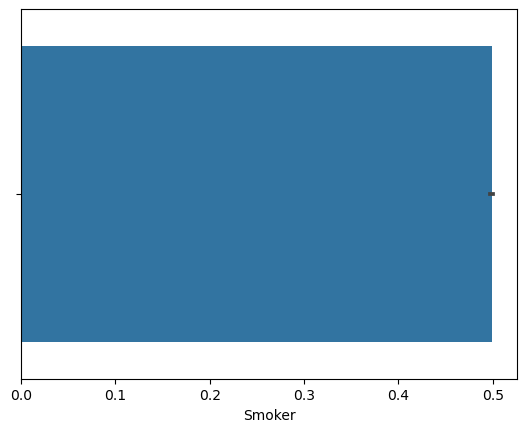

In [7]:
sns.barplot(df,x='Smoker',hue='Smoker')
plt.show()

In [27]:
df.groupby('Diabetes')['Outcome'].value_counts()

Diabetes  Outcome        
No        No Heart Attack    93211
          Heart Attack       92908
Yes       No Heart Attack    93447
          Heart Attack       93408
Name: count, dtype: int64

In [28]:
df.groupby(['Outcome','Gender'])['BloodPressure'].mean()

Outcome          Gender
Heart Attack     Female    134.560804
                 Male      134.481449
No Heart Attack  Female    134.613820
                 Male      134.377684
Name: BloodPressure, dtype: float64

In [29]:
df['StrokeHistory']=df['StrokeHistory'].replace([0,1],['No','Yes'])        

In [30]:
df.groupby('StrokeHistory')['Outcome'].value_counts().sort_values(ascending=False)

StrokeHistory  Outcome        
Yes            Heart Attack       93454
               No Heart Attack    93337
No             No Heart Attack    93321
               Heart Attack       92862
Name: count, dtype: int64

In [31]:
df.groupby(['Gender','Outcome'])[['Cholesterol','BloodPressure','HeartRate','BMI']].mean()

Cholesterol  BloodPressure  HeartRate        BMI
Gender Outcome                                                          
Female Heart Attack      199.305291     134.560804  89.473651  28.989243
       No Heart Attack   199.691262     134.613820  89.453914  28.986341
Male   Heart Attack      199.379745     134.481449  89.465363  29.029359
       No Heart Attack   199.447521     134.377684  89.586693  29.021892

C:\Users\dappi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


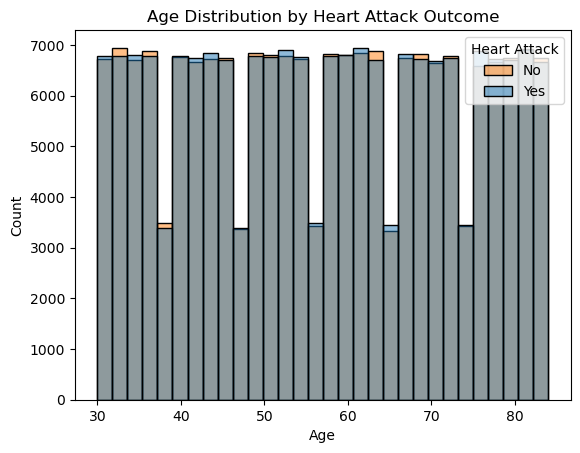

In [67]:
sns.histplot(data=df, x='Age', hue='Outcome', bins=30,color='red')
plt.title('Age Distribution by Heart Attack Outcome')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Attack', labels=['No', 'Yes'])
plt.show()

# observation:
Heart attack cases are evenly distributed across age groups (30–85).

No clear peak in any particular age group.

Both heart attack Yes/No groups appear balanced in each age bin.

In [33]:
age_stats = df.groupby('Outcome')['Age'].describe()
print("\nAge Statistics by Heart Attack Outcome:")
print(age_stats)


Age Statistics by Heart Attack Outcome:
                    count       mean        std   min   25%   50%   75%   max
Outcome                                                                      
Heart Attack     186316.0  56.960116  15.875396  30.0  43.0  57.0  71.0  84.0
No Heart Attack  186658.0  56.990158  15.858676  30.0  43.0  57.0  71.0  84.0


<Figure size 800x500 with 0 Axes>

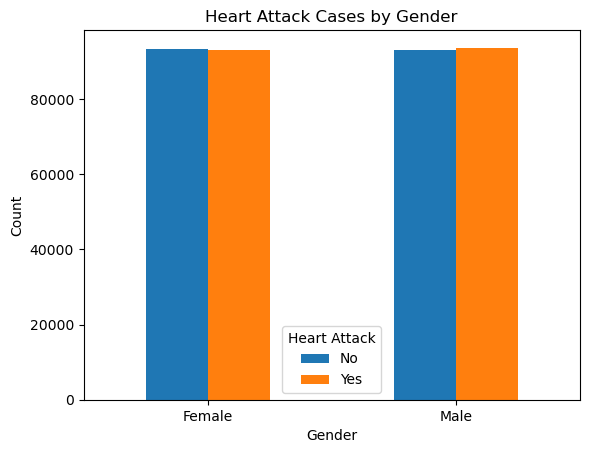

In [18]:
plt.figure(figsize=(8, 5))

# Gender distribution by outcome
gender_counts = df.groupby(['Gender', 'Outcome']).size().unstack()
gender_counts.plot(kind='bar')
plt.title('Heart Attack Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Heart Attack', labels=['No', 'Yes'])
plt.show()

In [70]:
total_cases = df[df['Outcome'] == 'Heart Attack'].shape[0]
male_cases = df[(df['Gender'] == 'Male') & (df['Outcome'] == 'Heart Attack')].shape[0]
female_cases = df[(df['Gender'] == 'Female') & (df['Outcome'] == 'Heart Attack')].shape[0]

In [71]:
print(f"\nGender Distribution of Heart Attack Cases:")
print(f"Males: {male_cases} cases ({male_cases/total_cases:.1%})")
print(f"Females: {female_cases} cases ({female_cases/total_cases:.1%})")


Gender Distribution of Heart Attack Cases:
Males: 93123 cases (50.0%)
Females: 93193 cases (50.0%)


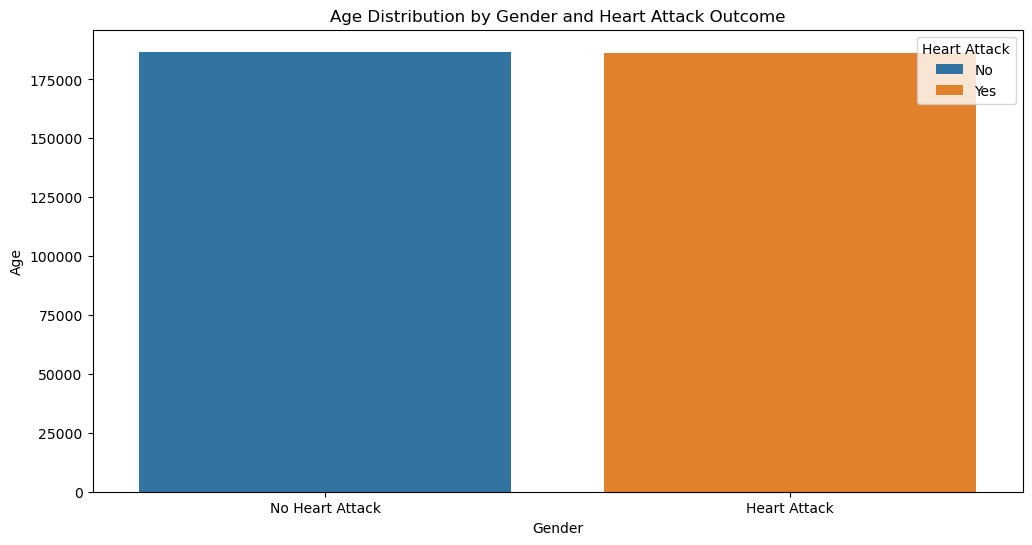

In [79]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Gender',hue='Gender')
sns.countplot(data=df,x='Age')
sns.countplot(data=df,x='Outcome')
plt.title('Age Distribution by Gender and Heart Attack Outcome')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Heart Attack', labels=['No', 'Yes'])
plt.show()

* Age distribution is very similar between men and women, regardless of heart attack status.

* Most heart attacks seem to occur between ages 45 and 75.

* No strong gender-based difference in heart attack likelihood is visually evident.

# Medical Indicators

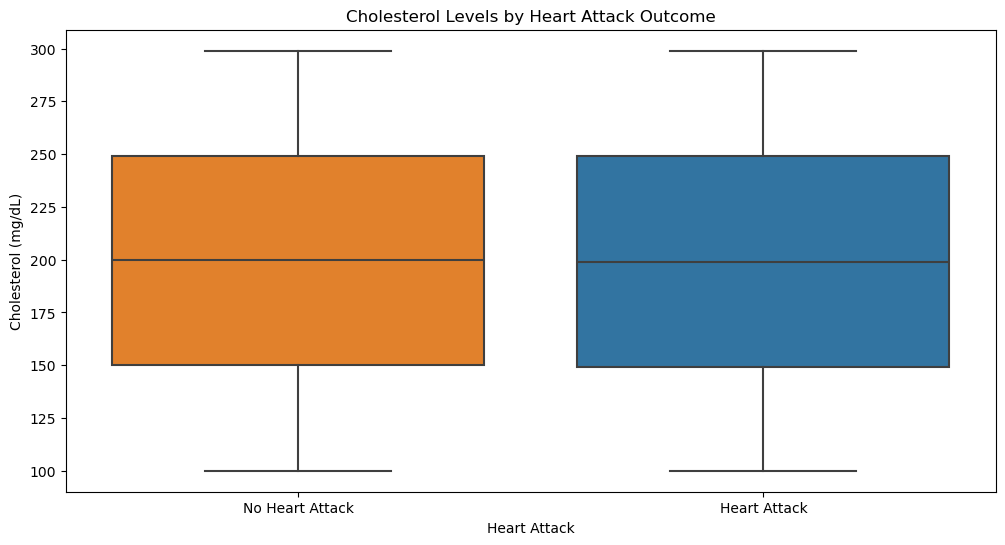


Cholesterol Statistics by Heart Attack Outcome:
                    count        mean        std    min    25%    50%    75%  \
Outcome                                                                        
Heart Attack     186316.0  199.342504  57.758458  100.0  149.0  199.0  249.0   
No Heart Attack  186658.0  199.568976  57.688280  100.0  150.0  200.0  249.0   

                   max  
Outcome                 
Heart Attack     299.0  
No Heart Attack  299.0  


In [38]:
# Convert Outcome to binary (1 for Heart Attack, 0 for No Heart Attack)
df['Outcome_binary'] = df['Outcome'].apply(lambda x: 1 if x == 'Heart Attack' else 0)

# 1. Cholesterol Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Outcome', y='Cholesterol', palette=['#ff7f0e', '#1f77b4'])
plt.title('Cholesterol Levels by Heart Attack Outcome')
plt.xlabel('Heart Attack')
plt.ylabel('Cholesterol (mg/dL)')
plt.show()

# Cholesterol statistics
chol_stats = df.groupby('Outcome')['Cholesterol'].describe()
print("\nCholesterol Statistics by Heart Attack Outcome:")
print(chol_stats)

Both groups (Heart Attack and No Heart Attack) have similar distributions of cholesterol.

Mean cholesterol is nearly identical (~199 mg/dL), suggesting cholesterol level alone isn’t a strong differentiator.

In [39]:
# 2. Blood Pressure Analysis
# Create BP categories
df['BP_Category'] = pd.cut(df['BloodPressure'], 
                          bins=[0, 120, 140, 200],
                          labels=['Normal', 'Elevated', 'High'])

# Calculate risk ratios
bp_counts = df.groupby(['BP_Category', 'Outcome']).size().unstack()
bp_counts['Risk'] = (bp_counts['Heart Attack'] / bp_counts.sum(axis=1)) * 100
normal_risk = bp_counts.loc['Normal', 'Risk']
high_risk = bp_counts.loc['High', 'Risk']
risk_increase = ((high_risk - normal_risk) / normal_risk) * 100

print("\nBlood Pressure Risk Analysis:")
print(bp_counts)
print(f"\nRisk increase for High BP vs Normal: {risk_increase:.1f}%")


Blood Pressure Risk Analysis:
Outcome      Heart Attack  No Heart Attack       Risk
BP_Category                                          
Normal              64303            64343  49.984453
Elevated            41109            41490  49.769368
High                80904            80825  50.024424

Risk increase for High BP vs Normal: 0.1%


C:\Users\dappi\AppData\Local\Temp\ipykernel_10368\3280222017.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bp_counts = df.groupby(['BP_Category', 'Outcome']).size().unstack()


C:\Users\dappi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\dappi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


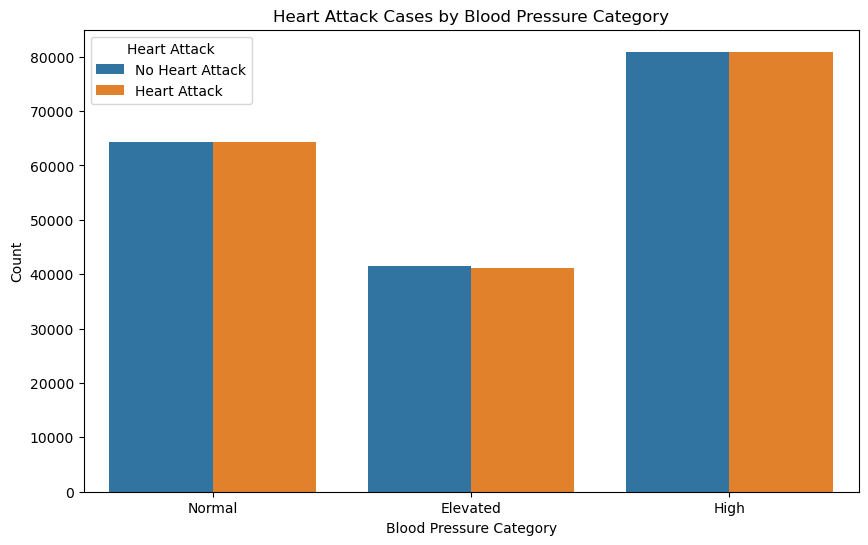

In [80]:
# Visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='BP_Category', hue='Outcome')
plt.title('Heart Attack Cases by Blood Pressure Category')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count')
plt.legend(title='Heart Attack')
plt.show()

# Observation:
* High Blood Pressure category shows the highest count of heart attack cases.
* Surprisingly, Normal and Elevated BP categories also show significant numbers, indicating that blood pressure alone is not a sufficient indicator.

In [41]:
# 3. BMI Analysis
# Create BMI categories
df['BMI_Category'] = pd.cut(df['BMI'], 
                           bins=[0, 18.5, 25, 30, 100],
                           labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Calculate risk ratios
bmi_counts = df.groupby(['BMI_Category', 'Outcome']).size().unstack()
bmi_counts['Risk'] = (bmi_counts['Heart Attack'] / bmi_counts.sum(axis=1)) * 100
normal_risk = bmi_counts.loc['Normal', 'Risk']
obese_risk = bmi_counts.loc['Obese', 'Risk']
risk_increase = ((obese_risk - normal_risk) / normal_risk) * 100

print("\nBMI Risk Analysis:")
print(bmi_counts)
print(f"\nRisk increase for Obese vs Normal: {risk_increase:.1f}%")


BMI Risk Analysis:
Outcome       Heart Attack  No Heart Attack       Risk
BMI_Category                                          
Underweight           4700             4738  49.798686
Normal               55014            54751  50.119801
Overweight           41999            42865  49.489772
Obese                84603            84304  50.088510

Risk increase for Obese vs Normal: -0.1%


C:\Users\dappi\AppData\Local\Temp\ipykernel_10368\4294596077.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_counts = df.groupby(['BMI_Category', 'Outcome']).size().unstack()


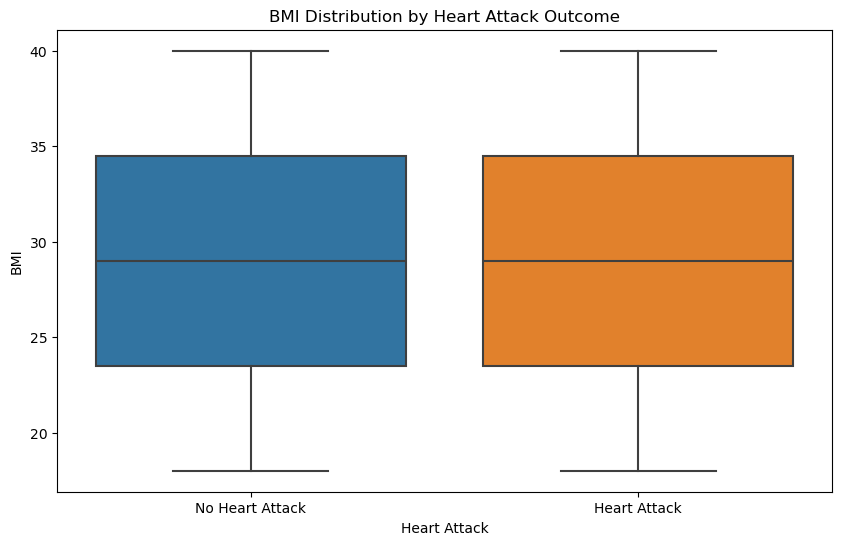

In [42]:
# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Outcome', y='BMI')
plt.title('BMI Distribution by Heart Attack Outcome')
plt.xlabel('Heart Attack')
plt.ylabel('BMI')
plt.show()

# observation:
* BMI distributions for heart attack vs no heart attack groups are nearly identical.

* Median BMI hovers around 29, which is considered overweight, suggesting a general higher BMI trend in the population.

In [43]:
# 4. Heart Rate Analysis
# Create Heart Rate categories
df['HR_Category'] = pd.cut(df['HeartRate'], 
                          bins=[0, 60, 90, 200],
                          labels=['Normal', 'Elevated', 'High'])

# Calculate risk ratios
hr_counts = df.groupby(['HR_Category', 'Outcome']).size().unstack()
hr_counts['Risk'] = (hr_counts['Heart Attack'] / hr_counts.sum(axis=1)) * 100

print("\nHeart Rate Risk Analysis:")
print(hr_counts)


Heart Rate Risk Analysis:
Outcome      Heart Attack  No Heart Attack       Risk
HR_Category                                          
Normal               3051             3071  49.836655
Elevated            93219            93390  49.954182
High                90046            90197  49.958112


C:\Users\dappi\AppData\Local\Temp\ipykernel_10368\2275338616.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hr_counts = df.groupby(['HR_Category', 'Outcome']).size().unstack()


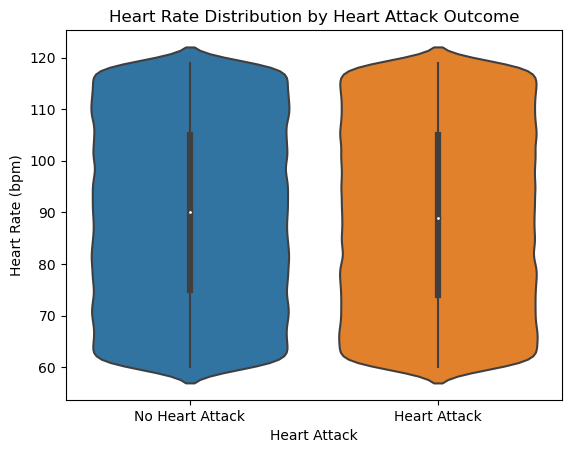

In [61]:
# Visualization
sns.violinplot(data=df, x='Outcome', y='HeartRate')
plt.title('Heart Rate Distribution by Heart Attack Outcome')
plt.xlabel('Heart Attack')
plt.ylabel('Heart Rate (bpm)')
plt.show()

# observation:
* Heart rate distributions also show no major differences between the two groups.

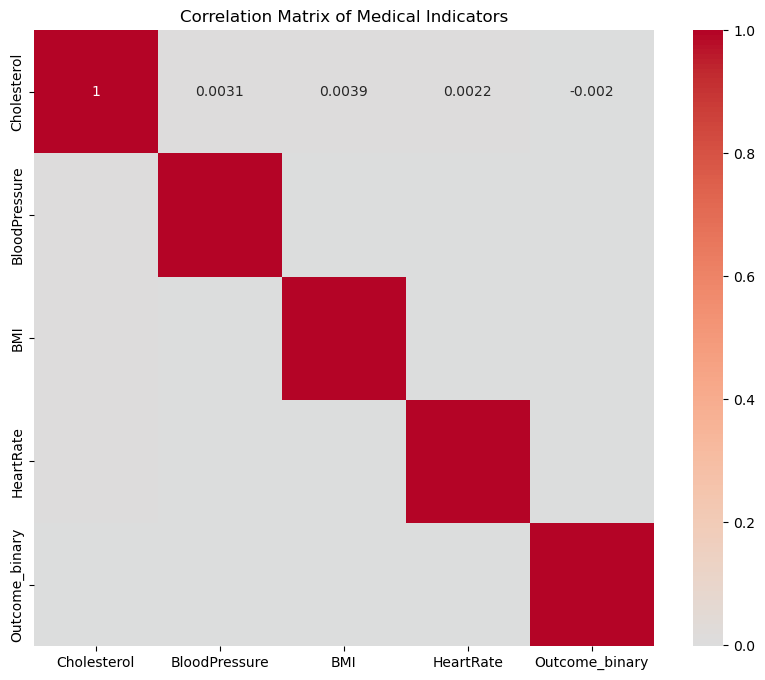

In [45]:
# Correlation matrix of medical indicators
medical_indicators = df[['Cholesterol', 'BloodPressure', 'BMI', 'HeartRate', 'Outcome_binary']]
plt.figure(figsize=(10, 8))
sns.heatmapw(medical_indicators.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Medical Indicators')
plt.show()

In [46]:
df.head()

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome,Outcome_binary,BP_Category,BMI_Category,HR_Category
0,31,Male,194,162,71,22.9,No,Yes,0,0,...,0,No,Suburban,Retired,Single,No Heart Attack,0,High,Normal,Elevated
1,69,Male,208,148,93,33.9,Yes,Yes,0,0,...,0,No,Suburban,Unemployed,Married,No Heart Attack,0,High,Obese,High
2,34,Female,132,161,94,34.0,No,No,1,1,...,1,No,Rural,Retired,Single,Heart Attack,1,High,Obese,High
3,53,Male,268,134,91,35.0,No,Yes,1,0,...,1,No,Suburban,Retired,Widowed,No Heart Attack,0,Elevated,Obese,High
4,57,Female,203,140,75,30.1,No,Yes,0,0,...,1,No,Rural,Retired,Married,Heart Attack,1,Elevated,Obese,Elevated


In [47]:
x=df[(df['Smoker']=='Yes') & (df['Diabetes']=='Yes') & (df['Diabetes']=='Yes') & (df['Diabetes']=='Yes')]

In [48]:
df['Hypertension'].value_counts()

Hypertension
1    186850
0    186124
Name: count, dtype: int64

In [49]:
df['Hypertension']=df['Hypertension'].replace([0,1],['No','Yes'])       # replacing [0,1] to ['No','Yes'] of the smoker column

In [50]:
df['PreviousHeartAttack'].value_counts()

PreviousHeartAttack
0    187629
1    185345
Name: count, dtype: int64

In [51]:
df['PreviousHeartAttack']=df['PreviousHeartAttack'].replace([0,1],['No','Yes'])       # replacing [0,1] to ['No','Yes'] of the smoker column

In [52]:
df['FamilyHistory'].value_counts()

FamilyHistory
0    186524
1    186450
Name: count, dtype: int64

In [53]:
df['FamilyHistory']=df['FamilyHistory'].replace([0,1],['No','Yes'])       # replacing [0,1] to ['No','Yes'] of the smoker column

In [54]:
df['PhysicalActivity'].value_counts()

PhysicalActivity
6    53450
4    53360
5    53326
3    53290
1    53268
2    53155
0    53125
Name: count, dtype: int64

In [55]:
df.head().T

,0,1,2,3,4
Age,31,69,34,53,57
Gender,Male,Male,Female,Male,Female
Cholesterol,194,208,132,268,203
BloodPressure,162,148,161,134,140
HeartRate,71,93,94,91,75
BMI,22.9,33.9,34.0,35.0,30.1
Smoker,No,Yes,No,No,No
Diabetes,Yes,Yes,No,Yes,Yes
Hypertension,No,No,Yes,Yes,No
FamilyHistory,No,No,Yes,No,No


In [56]:
x=df[(df['Smoker']=='Yes') & (df['Diabetes']=='Yes') & (df['Hypertension']=='Yes') & (df['PreviousHeartAttack']=='Yes')]

In [57]:
x.shape

(23214, 36)

In [58]:
x.head()

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome,Outcome_binary,BP_Category,BMI_Category,HR_Category
19,45,Female,155,98,101,19.6,Yes,Yes,Yes,No,...,Yes,Yes,Suburban,Employed,Widowed,Heart Attack,1,Normal,Normal,High
25,31,Male,157,129,107,23.8,Yes,Yes,Yes,Yes,...,Yes,No,Urban,Employed,Single,No Heart Attack,0,Elevated,Normal,High
35,81,Male,115,123,78,36.5,Yes,Yes,Yes,Yes,...,Yes,No,Urban,Employed,Single,Heart Attack,1,Elevated,Obese,Elevated
48,79,Male,175,145,76,23.5,Yes,Yes,Yes,No,...,Yes,No,Suburban,Unemployed,Divorced,Heart Attack,1,High,Normal,Elevated
73,72,Male,254,174,110,33.3,Yes,Yes,Yes,No,...,Yes,No,Suburban,Unemployed,Married,No Heart Attack,0,High,Obese,High


In [62]:
# calculating heart risk:
pct=(len(x[x['Outcome']=='Heart Attack'])/len(x))*100
pct

50.12492461445679

In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,372964,372965,372966,372967,372968,372969,372970,372971,372972,372973
Age,31,69,34,53,57,41,45,61,45,30,...,40,46,51,71,35,49,77,53,78,71
Gender,Male,Male,Female,Male,Female,Male,Female,Female,Male,Male,...,Female,Female,Male,Female,Female,Female,Male,Female,Female,Male
Cholesterol,194,208,132,268,203,158,237,218,216,143,...,266,277,188,284,160,285,197,243,291,127
BloodPressure,162,148,161,134,140,154,168,113,114,130,...,98,97,106,143,113,131,159,94,93,153
HeartRate,71,93,94,91,75,72,114,115,72,91,...,80,60,105,91,74,79,64,84,78,83
BMI,22.9,33.9,34.0,35.0,30.1,38.7,21.7,23.1,24.8,24.7,...,22.5,18.9,36.5,36.8,30.0,27.6,33.5,34.7,29.3,39.7
Smoker,0,1,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,1,1,1
Diabetes,1,1,0,1,1,1,0,1,1,1,...,0,1,1,1,1,1,1,1,1,1
Hypertension,0,0,1,1,0,0,0,0,0,0,...,1,1,1,1,0,1,0,1,0,1
FamilyHistory,0,0,1,0,0,1,0,1,1,0,...,1,0,1,1,1,1,1,0,1,0


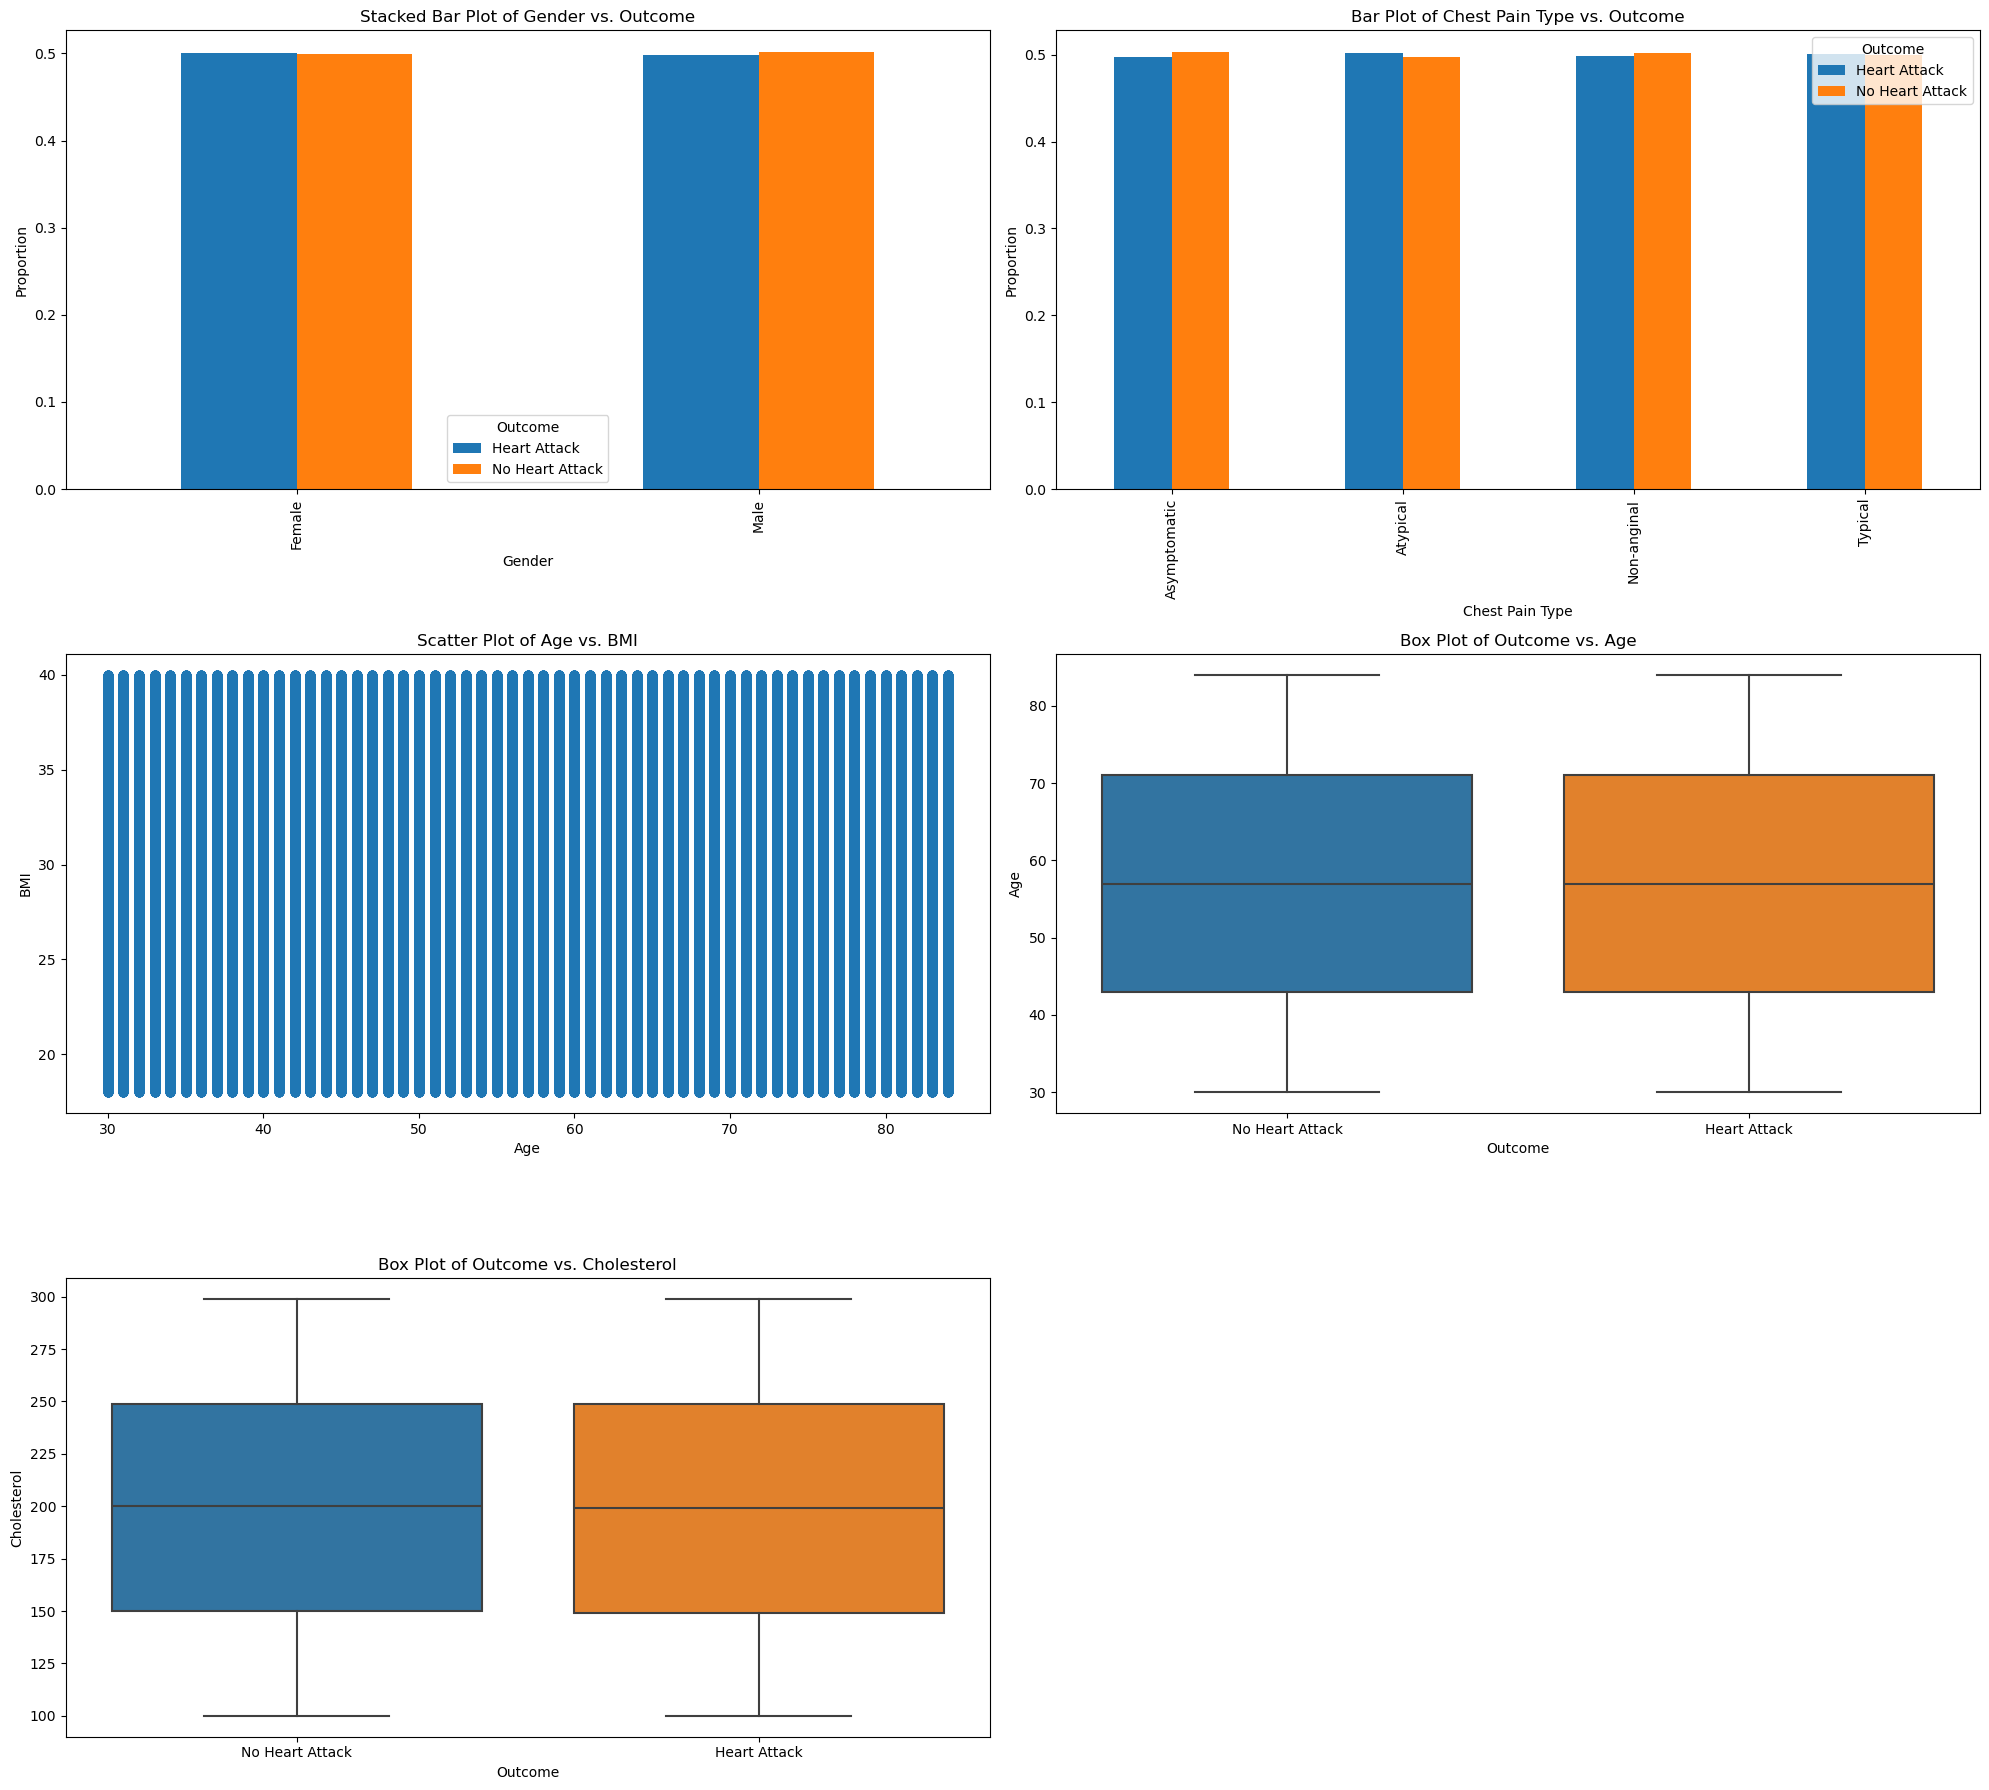

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(3, 2, figsize=(20, 18))

# 1. Stacked bar plot for categorical-categorical relationship (Gender vs. Outcome)
gender_outcome_ct = pd.crosstab(df['Gender'], df['Outcome'])
gender_outcome_ct.div(gender_outcome_ct.sum(axis=1), axis=0).plot(kind='bar',ax=axes[0, 0])
axes[0, 0].set_title('Stacked Bar Plot of Gender vs. Outcome')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Proportion')
axes[0, 0].legend(title='Outcome')

# 2. Stacked bar plot for categorical-categorical relationship (ChestPainType vs. Outcome)
chest_pain_outcome_ct = pd.crosstab(df['ChestPainType'], df['Outcome'])
chest_pain_outcome_ct.div(chest_pain_outcome_ct.sum(axis=1), axis=0).plot(kind='bar',ax=axes[0, 1])
axes[0, 1].set_title('Bar Plot of Chest Pain Type vs. Outcome')
axes[0, 1].set_xlabel('Chest Pain Type')
axes[0, 1].set_ylabel('Proportion')
axes[0, 1].legend(title='Outcome')

# 3. Scatter plot for numerical-numerical relationship (Age vs. BMI)
axes[1, 0].scatter(df['Age'], df['BMI'])
axes[1, 0].set_title('Scatter Plot of Age vs. BMI')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('BMI')

# 4. Box plot for numerical-categorical relationship (Outcome vs. Age)
sns.boxplot(x='Outcome', y='Age', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Outcome vs. Age')
axes[1, 1].set_xlabel('Outcome')
axes[1, 1].set_ylabel('Age')

# 5. Box plot for numerical-categorical relationship (Outcome vs. Cholesterol)
sns.boxplot(x='Outcome', y='Cholesterol', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Box Plot of Outcome vs. Cholesterol')
axes[2, 0].set_xlabel('Outcome')
axes[2, 0].set_ylabel('Cholesterol')

# Remove the empty subplot
fig.delaxes(axes[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\dappi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dappi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dappi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dappi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

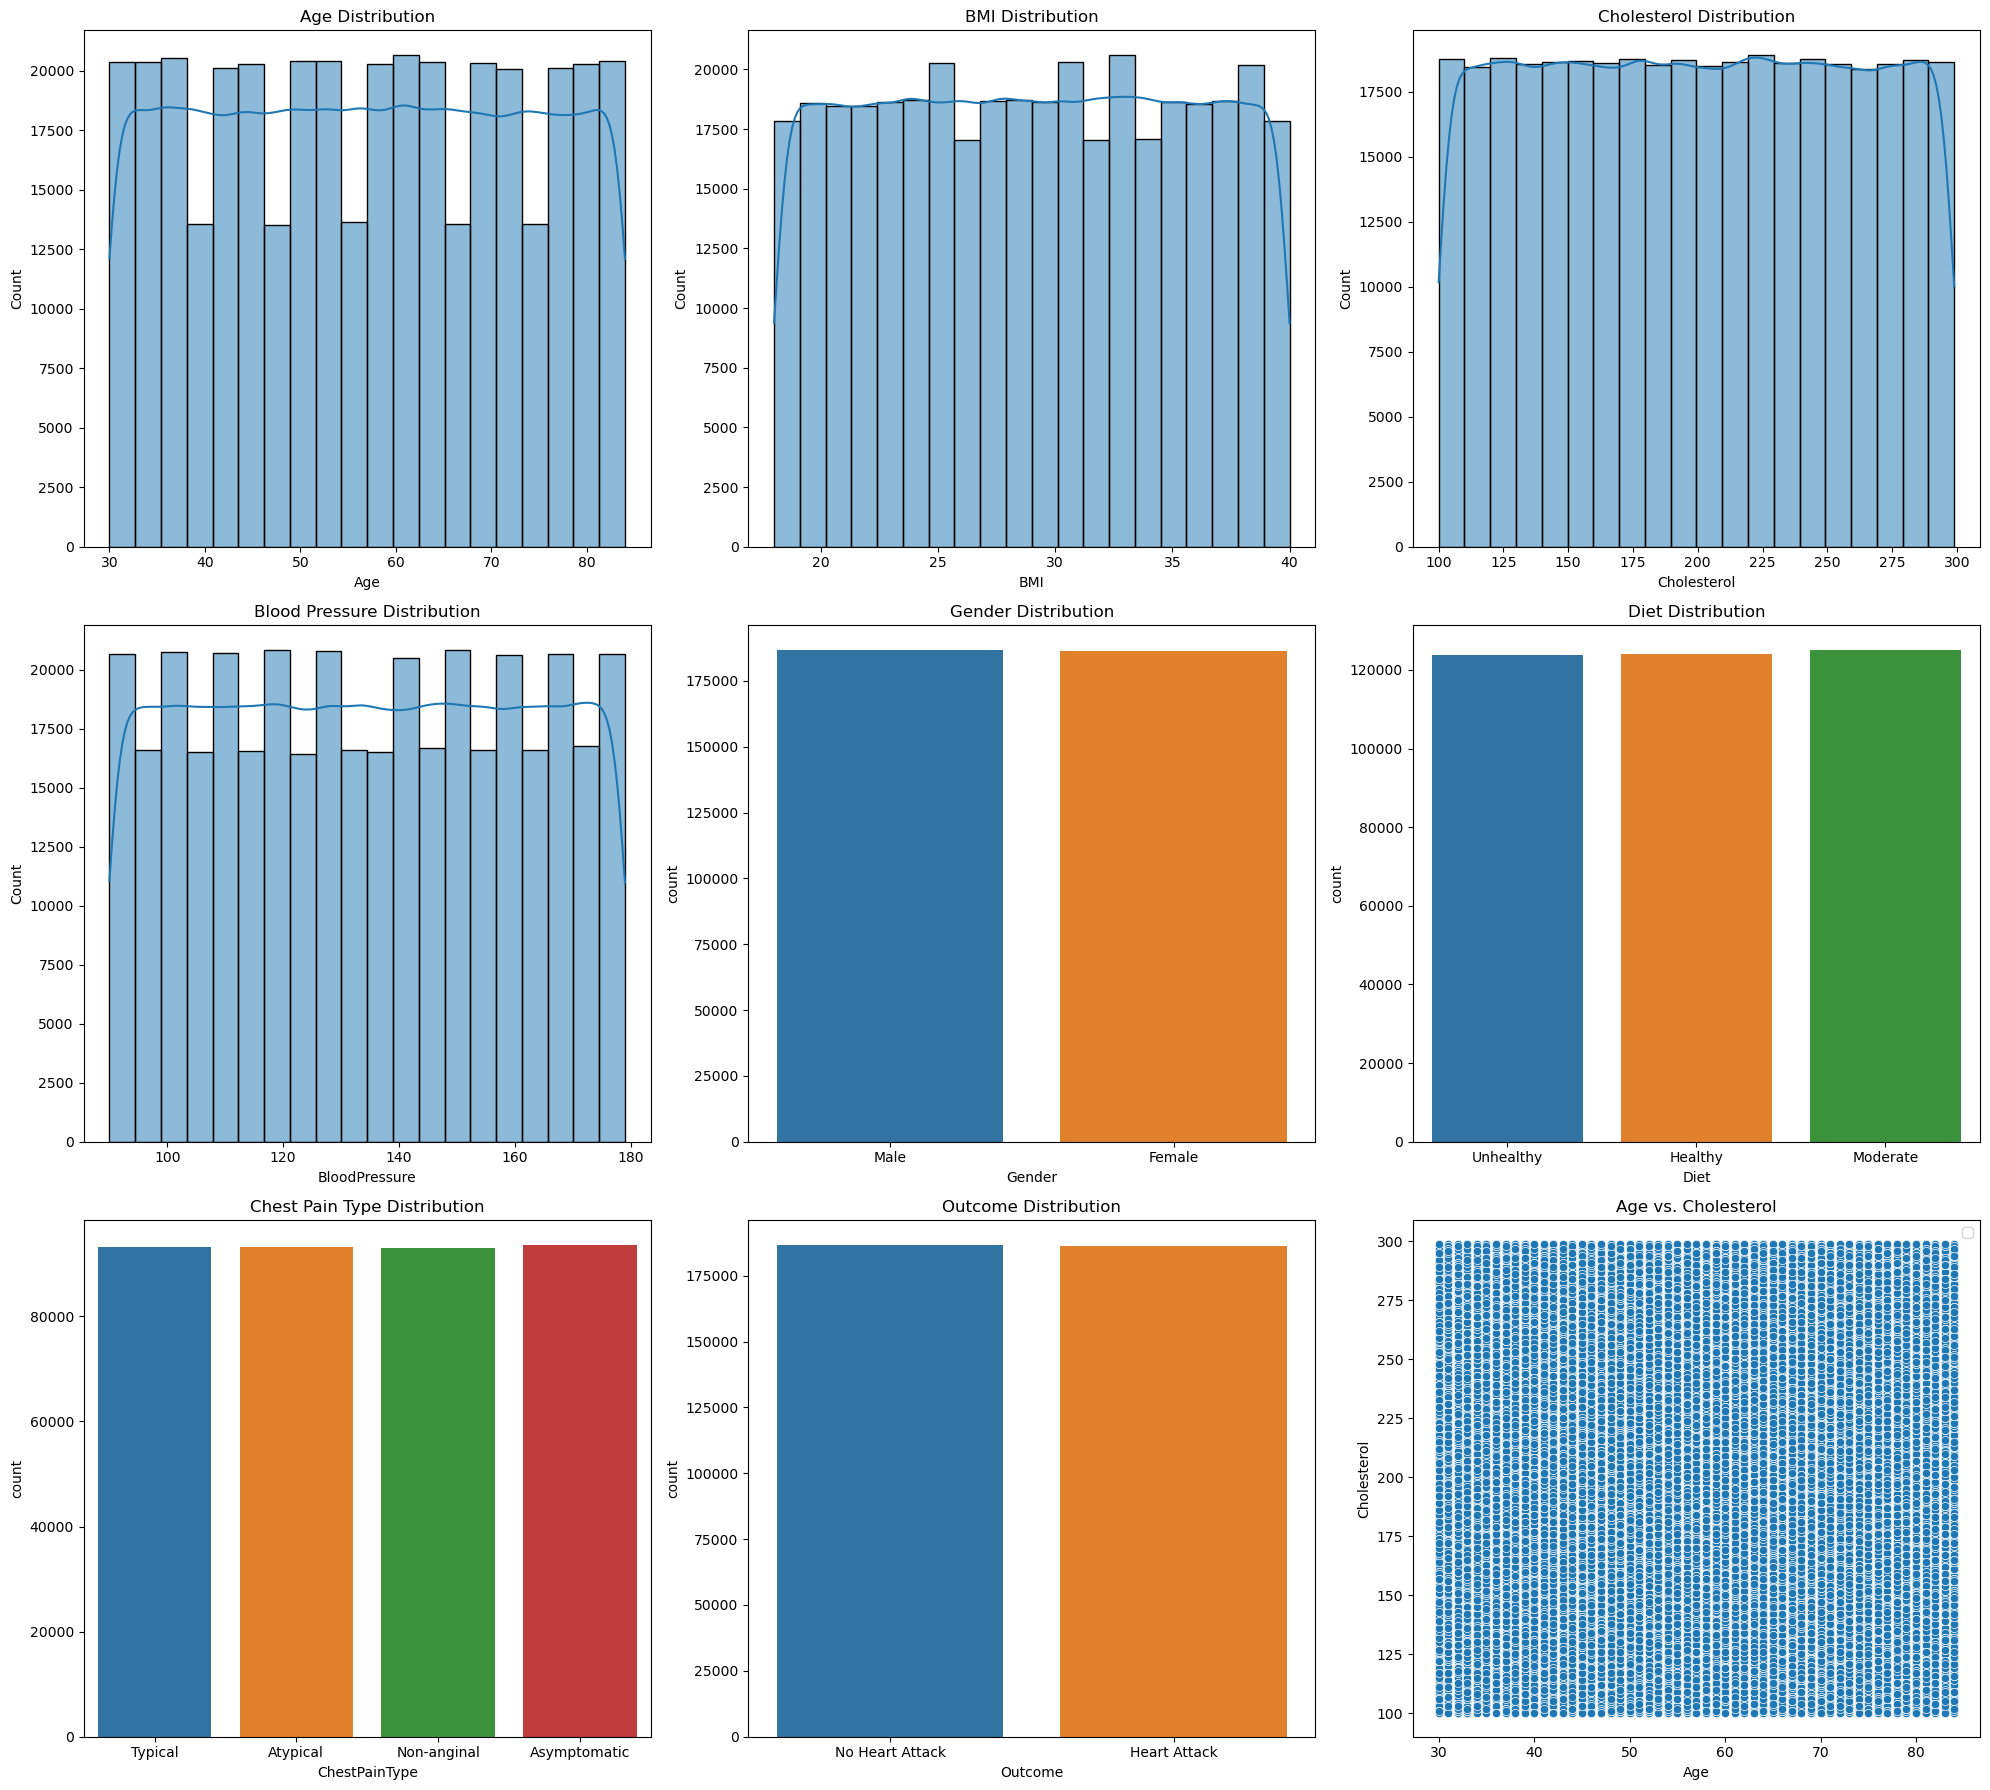

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(3, 3, figsize=(20, 18))

# 1. Histograms for numerical variables
sns.histplot(df['Age'], bins=20, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['BMI'], bins=20, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('BMI Distribution')

sns.histplot(df['Cholesterol'], bins=20, ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Cholesterol Distribution')

sns.histplot(df['BloodPressure'], bins=20, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Blood Pressure Distribution')

# 2. Count plots for categorical variables
sns.countplot(data=df, x='Gender', ax=axes[1, 1])
axes[1, 1].set_title('Gender Distribution')

sns.countplot(data=df, x='Diet', ax=axes[1, 2])
axes[1, 2].set_title('Diet Distribution')

sns.countplot(data=df, x='ChestPainType', ax=axes[2, 0])
axes[2, 0].set_title('Chest Pain Type Distribution')
plt.legend(['Tyoical','Atypical','Non Anaginal','Asympotatic'])

sns.countplot(data=df, x='Outcome', ax=axes[2, 1])
axes[2, 1].set_title('Outcome Distribution')

# 3. Scatter plot for Age vs. Cholesterol
sns.scatterplot(data=df, x='Age', y='Cholesterol', ax=axes[2, 2])
axes[2, 2].set_title('Age vs. Cholesterol')

# Adjust layout
plt.tight_layout()
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372974 entries, 0 to 372973
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Age                    372974 non-null  int64  
 1   Gender                 372974 non-null  object 
 2   Cholesterol            372974 non-null  int64  
 3   BloodPressure          372974 non-null  int64  
 4   HeartRate              372974 non-null  int64  
 5   BMI                    372974 non-null  float64
 6   Smoker                 372974 non-null  int64  
 7   Diabetes               372974 non-null  int64  
 8   Hypertension           372974 non-null  int64  
 9   FamilyHistory          372974 non-null  int64  
 10  PhysicalActivity       372974 non-null  int64  
 11  AlcoholConsumption     372974 non-null  int64  
 12  Diet                   372974 non-null  object 
 13  StressLevel            372974 non-null  int64  
 14  Ethnicity              372974 non-nu

In [16]:
df['Cholesterol'].median()

199.0

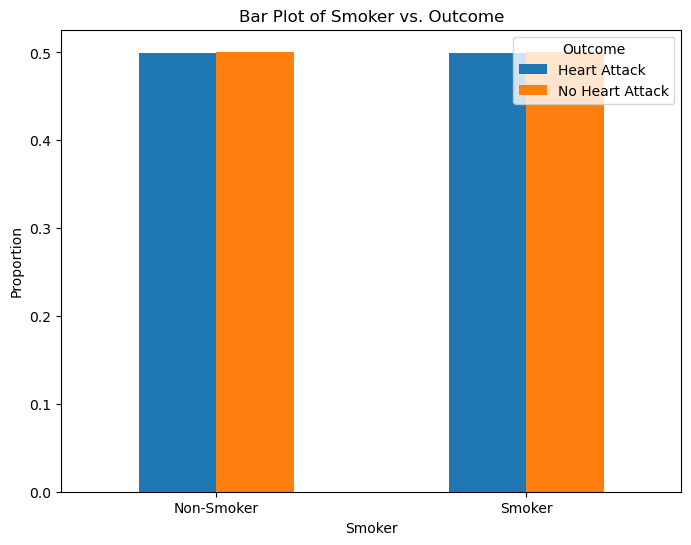

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a contingency table of `Smoker` and `Outcome`
smoker_outcome_ct = pd.crosstab(df['Smoker'], df['Outcome'])

# Create a stacked bar plot of `Smoker` vs. `Outcome`
smoker_outcome_ct.div(smoker_outcome_ct.sum(axis=1), axis=0).plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title('Bar Plot of Smoker vs. Outcome')
plt.xlabel('Smoker')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'], rotation=0)  # Set x-ticks and labels
plt.legend(title='Outcome')

# Show the plot
plt.show()

In [24]:
# Filter the DataFrame for individuals who are smokers, have diabetes, and have hypertension
filtered_df = df[(df['Smoker'] == 1) & (df['Diabetes'] == 1) & (df['Hypertension'] == 1)]

# Calculate the total number of individuals who satisfy these conditions
total_individuals = len(filtered_df)

# Calculate the number of individuals with a heart attack within this group
heart_attack_cases = len(filtered_df[filtered_df['Outcome'] == 'Heart Attack'])

# Calculate the percentage
percentage_heart_attack = (heart_attack_cases / total_individuals) * 100 if total_individuals > 0 else 0

# Print the result
print(f"Percentage of individuals with Heart Attack among smokers with diabetes and hypertension: {percentage_heart_attack:.2f}%")

Percentage of individuals with Heart Attack among smokers with diabetes and hypertension: 50.10%


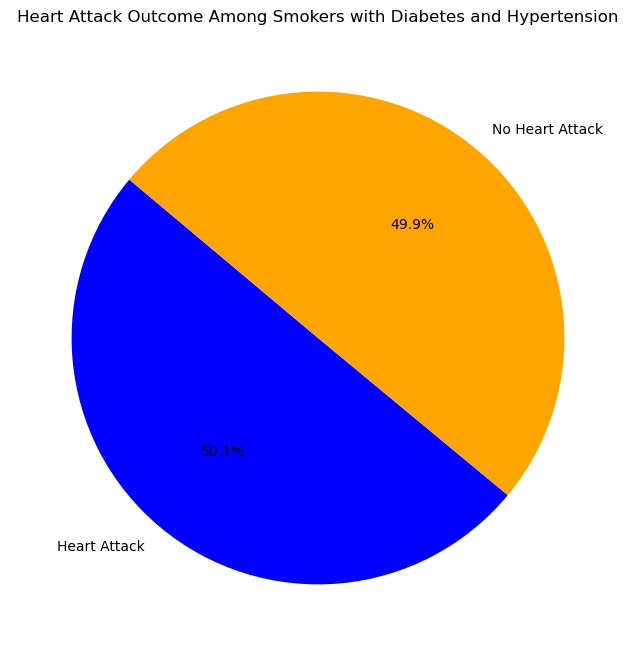

In [31]:
import matplotlib.pyplot as plt

# Filter the DataFrame for individuals who are smokers, have diabetes, and have hypertension
filtered_df = df[(df['Smoker'] == 1) & (df['Diabetes'] == 1) & (df['Hypertension'] == 1)]

# Count the occurrences of 'Heart Attack' and 'No Heart Attack'
outcome_counts = filtered_df['Outcome'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange'])
plt.title('Heart Attack Outcome Among Smokers with Diabetes and Hypertension')
plt.ylabel(None) # Remove the default ylabel to make it cleaner

# Show the plot
plt.show()

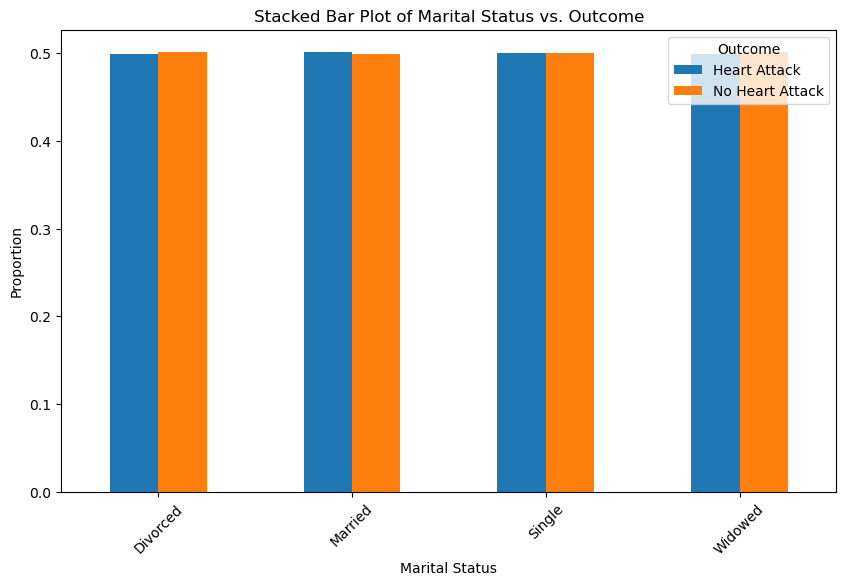

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a contingency table of `MaritalStatus` and `Outcome`
marital_status_outcome_ct = pd.crosstab(df['MaritalStatus'], df['Outcome'])

# Create a stacked bar plot of `MaritalStatus` vs. `Outcome`
marital_status_outcome_ct.div(marital_status_outcome_ct.sum(axis=1), axis=0).plot(kind='bar',  figsize=(10, 6))
plt.title('Stacked Bar Plot of Marital Status vs. Outcome')
plt.xlabel('Marital Status')
plt.ylabel('Proportion')
plt.legend(title='Outcome')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

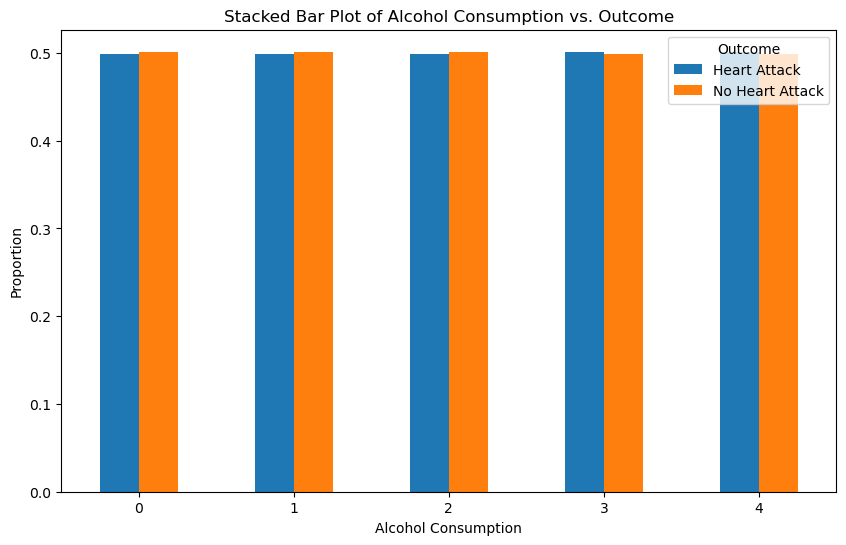

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a contingency table of `AlcoholConsumption` and `Outcome`
alcohol_outcome_ct = pd.crosstab(df['AlcoholConsumption'], df['Outcome'])

# Create a stacked bar plot of `AlcoholConsumption` vs. `Outcome`
alcohol_outcome_ct.div(alcohol_outcome_ct.sum(axis=1), axis=0).plot(kind='bar', figsize=(10, 6))
plt.title('Stacked Bar Plot of Alcohol Consumption vs. Outcome')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Proportion')
plt.legend(title='Outcome')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed for readability

# Show the plot
plt.show()

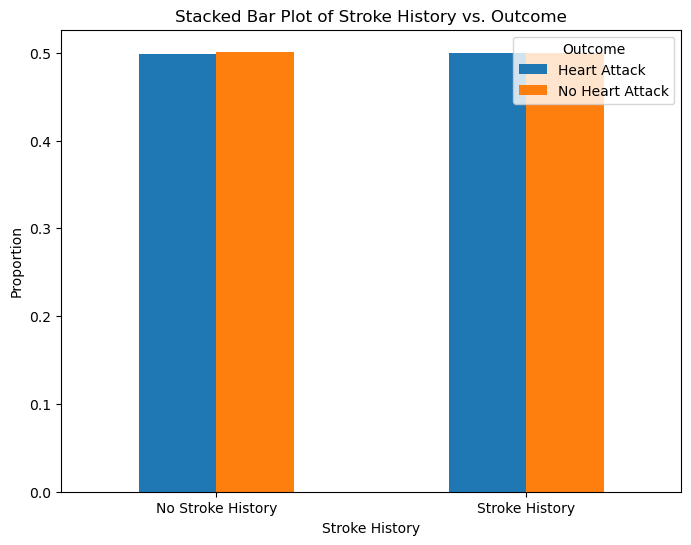

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a contingency table of `StrokeHistory` and `Outcome`
stroke_outcome_ct = pd.crosstab(df['StrokeHistory'], df['Outcome'])

# Create a stacked bar plot of `StrokeHistory` vs. `Outcome`
stroke_outcome_ct.div(stroke_outcome_ct.sum(axis=1), axis=0).plot(kind='bar', figsize=(8, 6))
plt.title('Stacked Bar Plot of Stroke History vs. Outcome')
plt.xlabel('Stroke History')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['No Stroke History', 'Stroke History'], rotation=0)  # Set x-ticks and labels
plt.legend(title='Outcome')

# Show the plot
plt.show()